In [1]:
from sklearn.datasets import load_digits
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
mnist = load_digits()
# load dataset
#load_digits() loads the Digits dataset from sklearn.datasets, which contains images of handwritten digits (0-9) but at a lower resolution (8x8 pixels).

In [3]:
type(mnist)
# mnist is a Bunch object (similar to a dictionary).
# sklearn.utils._bunch.Bunch is a lightweight utility class that can simplify data handling and improve code readability within scikit-learn projects

sklearn.utils._bunch.Bunch

In [4]:
mnist

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [5]:
pd.DataFrame(mnist.data).head()
# Printing the first 5 rows of the dataset

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [6]:
pd.DataFrame(mnist.target).head()
# This will display the first 5 labels of the digits dataset.

,0
0,0
1,1
2,2
3,3
4,4


In [7]:
X, y = mnist["data"], mnist["target"]
print(X.shape)
print(y.shape)
# assigning data to X and label values to y

(1797, 64)
(1797,)


The images are small and consist of 64 pixels (8 rows and 8 columns), each representing a pixel's intensity.

Each sample in digits.data is a flattened 1D array of 64 values (one for each pixel in the 8x8 grid).

# Binary Classification

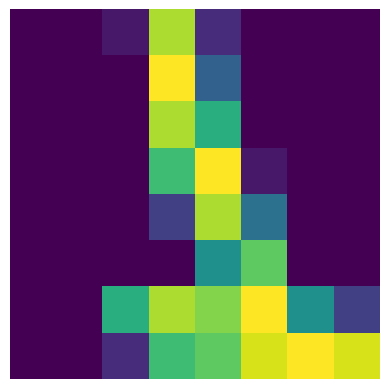

In [10]:
# assigning 1000th value of X in some_digit variable
some_digit = X[1000]
some_digit_image = some_digit.reshape(8, 8)
plt.imshow(some_digit_image, cmap = matplotlib.cm.viridis,interpolation="nearest")
# The cmap parameter defines the colormap used to map data values to colors. In this case, matplotlib.cm.binary is a colormap for binary (black-and-white) images.
# gray: A grayscale colormap.
# viridis: A perceptually uniform colormap (default for many plots).
# jet: A rainbow colormap, commonly used in scientific visualization.
# plasma, inferno, magma: Other perceptually uniform colormaps.

# interpolation - This determines how to handle interpolation when the image is resized. For nearest, no interpolation is applied
# bilinear: Interpolates the image to smooth pixel transitions (default for most images).
# bicubic: A more complex interpolation method, often resulting in smoother images.
# spline36: Uses spline interpolation with 36-degree polynomials.
# hanning, hamming, hermite, etc.: Various methods using window functions for interpolation.
plt.axis("off")
plt.show()

In [11]:
y[1000]
# label at 1000th index

1

In [12]:
 X_train, X_test, y_train, y_test = X[:1000], X[1000:], y[:1000], y[1000:]
# split into train and test set

In [13]:
 import numpy as np
 shuffle_index = np.random.permutation(1000)
# generates random sequence of numbers 0 to 999
 X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]
# we get shuffled data

In [21]:
 y_train_1 = (y_train == 1)  
# True for all 1s, False for all other digits.
 y_test_1 = (y_test == 1)

### SGD Classifier

The SGDClassifier in Scikit-Learn is a linear classifier that uses Stochastic Gradient Descent (SGD) to optimize the model parameters. It is particularly useful for large-scale classification problems.

In [29]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_1)
# for all 1 in y labels, True in fit

SGDClassifier(random_state=42)

In [31]:
sgd_clf.predict([some_digit])
# shows true as some digit is also 1 

array([ True])

cross validation

Performance measurement using cross validation

manually iterating through the splits

In [34]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
skfolds = StratifiedKFold(n_splits=3)
for train_index, test_index in skfolds.split(X_train, y_train_1):
   clone_clf = clone(sgd_clf)
   X_train_folds = X_train[train_index]
   y_train_folds = (y_train_1[train_index])
   X_test_fold = X_train[test_index]
   y_test_fold = (y_train_1[test_index])
    
   clone_clf.fit(X_train_folds, y_train_folds)
   y_pred = clone_clf.predict(X_test_fold)
   n_correct = sum(y_pred == y_test_fold)
   print(n_correct / len(y_pred)) 

0.9700598802395209
0.933933933933934
0.954954954954955


  - `clone_clf = clone(sgd_clf)` creates a new instance of the classifier (`sgd_clf`), ensuring that each fold uses a fresh copy of the classifier. This is important to avoid any carryover of learned parameters from previous folds.
  -   `n_correct = sum(y_pred == y_test_fold)` counts the number of correct predictions by comparing the predicted values (`y_pred`) with the actual values (`y_test_fold`).
   - `print(n_correct / len(y_pred))` calculates and prints the accuracy for the current fold by dividing the number of correct predictions by the total number of predictions made.
   - 3 


In [37]:
# cv using function
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_1, cv=3, scoring="accuracy")

array([0.97005988, 0.93393393, 0.95495495])


BaseEstimator this is imported from sklearn, helps to include cross validation and other methods.

Never1Classifier predicts false for all,as in this dataset,max predictons are false.This is just dummy classifier


In [40]:
# This is a format of how classifiers are made
from sklearn.base import BaseEstimator
class Never1Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
        # do nothing, just pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)
        # this returns numpy array filled with zeroes (here False)

In [42]:
never_1_clf = Never1Classifier()
cross_val_score(never_1_clf, X_train, y_train_1, cv=3, scoring="accuracy")

array([0.89221557, 0.8978979 , 0.9039039 ])

In [44]:
np.zeros((len(X), 1), dtype=bool)

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

prediction

In [47]:
# Instead of evaluating on the training set (which might lead to overfitting), cross_val_predict() ensures that each prediction is made on data not used in training.
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_1, cv=3)

confusion matrix

In [50]:
# used to evaluate the performance of a classification model.
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_1, y_train_pred)
# main diagonal has true negatives and true positives.
# For best prediction only this should have non zero values

array([[854,  44],
       [  3,  99]], dtype=int64)


 precision =TP/(TP+FP)
 
 recall =TP/(TP+FN)


In [53]:
from sklearn.metrics import precision_score, recall_score
print(precision_score(y_train_1, y_train_pred))   
print(recall_score(y_train_1, y_train_pred))

0.6923076923076923
0.9705882352941176


F1 = 2/(1/precision + 1/recall) 

= 2 × (precision ×recall)/(precision +recall) 


=TP/((TP)+(FN +FP)/2)

In [56]:
from sklearn.metrics import f1_score
f1_score(y_train_1, y_train_pred)

0.8081632653061225

 Instead of calling the classifier’s
 predict() method, you can call its decision_function() method, which returns a
 score for each instance, and then make predictions based on those scores using any
 threshold you want

In [111]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores
# here y_scores is the score of some_digit, which was 1000th value

array([5011.79625826])

In [113]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [115]:
threshold = 200000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred
# all false, as no value of y_scores is more than this threshold

array([False])

In [117]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_1, cv=3,method="decision_function")

In [119]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_1, y_scores)

In [121]:
precisions

array([0.102     , 0.1021021 , 0.10220441, ..., 1.        , 1.        ,
       1.        ])

In [123]:
recalls

array([1.        , 1.        , 1.        , ..., 0.01960784, 0.00980392,
       0.        ])

In [125]:
thresholds

array([-12186.08055024, -11601.3148179 , -11372.25847897, -11190.4170957 ,
       -11086.83722863, -11038.19797379, -10973.23505168, -10952.39788799,
       -10845.23748745, -10833.11472857, -10588.10739111, -10461.77548273,
       -10404.50305438, -10274.57721017, -10239.73758316, -10153.23137454,
       -10080.91415936, -10069.269862  ,  -9975.58904746,  -9876.69285656,
        -9778.16242804,  -9666.13967593,  -9640.269433  ,  -9631.07656667,
        -9620.04512706,  -9440.91157665,  -9431.97901747,  -9426.87469794,
        -9354.50654031,  -9333.84055515,  -9333.72086651,  -9304.37102921,
        -9284.19907693,  -9263.53647297,  -9243.1376073 ,  -9197.17327562,
        -9146.13712377,  -9122.40462942,  -9035.37882811,  -9026.49399187,
        -9024.18729322,  -9020.67024198,  -9000.02597721,  -8960.98375013,
        -8938.37810333,  -8838.72872152,  -8792.68715685,  -8789.62286807,
        -8748.30613433,  -8697.55876397,  -8695.68092521,  -8678.08275653,
        -8668.88324768,  

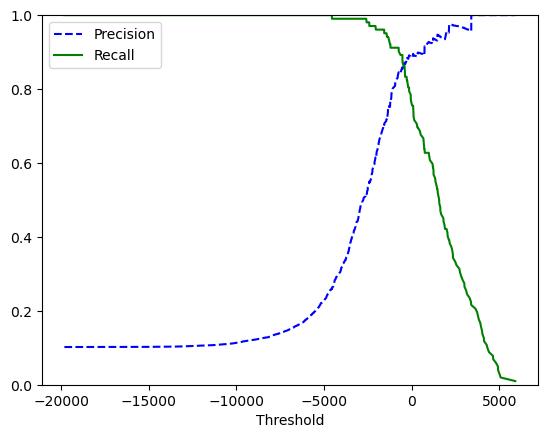

In [649]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
 plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
 plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
 plt.xlabel("Threshold")
 plt.legend(loc="upper left")
 plt.ylim([0, 1])
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()


In [127]:
import numpy as np

# Assuming precisions, recalls, and thresholds are already defined
# Example: precisions, recalls, thresholds = precision_recall_curve(y_true, y_scores)

target_precision = 0.9
threshold_for_90_precision = None

# Iterate through the precision values to find the corresponding threshold
for i in range(len(precisions)):
    if precisions[i] >= target_precision:
        threshold_for_90_precision = thresholds[i]
        break

if threshold_for_90_precision is not None:
    print(f'Threshold for 90% precision: {threshold_for_90_precision,i}')
else:
    print('90% precision not achievable with the current thresholds.')

Threshold for 90% precision: (1703.7320780400523, 908)


In [651]:
precisions[915]

0.8941176470588236

In [652]:
thresholds[915]

96.2301542421624

Insights from the Graph:

Threshold selection: The graph allows you to choose an appropriate threshold based on your application's needs:
If precision is more important (e.g., medical diagnosis, where false positives are costly), pick a threshold where precision is high.
If recall is more important (e.g., fraud detection, where false negatives are costly), pick a threshold where recall is high.
Balance point: You might want a balance where both precision and recall are reasonably high. This can be observed from the graph.

Extreme thresholds:

At very high thresholds (far right on the x-axis): Precision is perfect (1.0) because the model predicts very few positives, but recall is very low.
At very low thresholds (far left on the x-axis): Recall is perfect (1.0) because the model predicts almost everything as positive, but precision is very low.

How to Use It:

Examine how precision and recall vary across thresholds.
Identify a threshold that aligns with your goals:
For example, in an imbalanced dataset, you might want a threshold that keeps precision high while not sacrificing recall too much.
Use this threshold for the model's predictions.

Practical Example:

Imagine you're building a model to classify whether an email is spam (positive class) or not (negative class):

A high threshold might classify only the most obvious spam emails as positive, minimizing false positives but missing some spam (low recall, high precision).
A low threshold might classify almost everything as spam, catching most spam emails (high recall) but also marking legitimate emails as spam (low precision).

In [654]:
 y_train_pred_90 = (y_scores > 1611)

In [655]:
print(precision_score(y_train_1, y_train_pred_90))
recall_score(y_train_1, y_train_pred_90)

0.9423076923076923


0.4803921568627451

 Great, you have a 90% precision classifier (or close enough)! As you can see, it is
 fairly easy to create a classifier with virtually any precision you want: just set a high
 enough threshold, and you’re done. Hmm, not so fast. A high-precision classifier is
 not very useful if its recall is too low!

### ROC Curve

The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. It is very similar to the precision/recall curve, but instead of plotting precision versus recall, the ROC curve plots the true positive rate (another name for recall) against the false positive rate. The FPR is the ratio of negative instances that are incorrectly classified as positive. It is equal to one minus the true negative rate, which is the ratio of negative instances that are correctly classified as negative. The TNR is also called specificity. Hence the ROC curve plot sensitivity (recall) versus 1 – specificity.

In [134]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_1, y_scores)

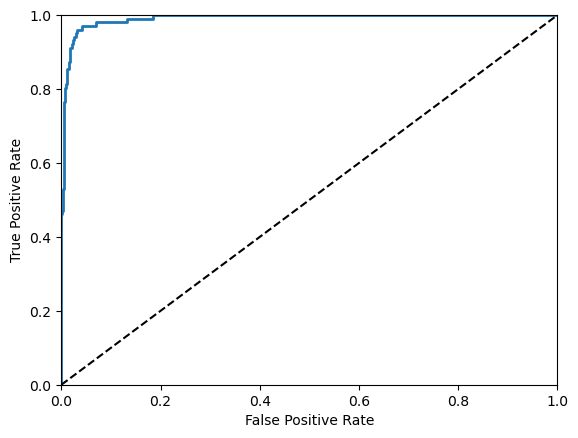

In [136]:
def plot_roc_curve(fpr, tpr, label=None):
 plt.plot(fpr, tpr, linewidth=2, label=label)
    # Plotting ROC curve
 plt.plot([0, 1], [0, 1], 'k--')
    # Dashed diagonal line
 plt.axis([0, 1, 0, 1])
    # Set x and y axis limits
 plt.xlabel('False Positive Rate')
 plt.ylabel('True Positive Rate')
 
plot_roc_curve(fpr, tpr)
plt.show()

 Once again there is a tradeoff: the higher the recall (TPR), the more false positives
 (FPR) the classifier produces. The dotted line represents the ROC curve of a purely
 random classifier; a good classifier stays as far away from that line as possible (toward
 the top-left corner).
 One way to compare classifiers is to measure the area under the curve (AUC). A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will
 have a ROC AUC equal to 0.5. 

In [157]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_1, y_scores)

0.9913970042359928

 Prefer the PR curve whenever the positive
 class is rare or when you care more about the false positives than
 the false negatives, and the ROC curve otherwise

https://www.youtube.com/watch?v=6tJXX3vmYl0&t=294s

### Compare curves of RandomforestClassifier and SGDClassifier

Let’s train a RandomForestClassifier and compare its ROC curve and ROC AUC
 score to the SGDClassifier. 

the RandomForestClassifier class does not have a decision_function() method. Instead it has a predict_proba() method

In [164]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_1, cv=3,method="predict_proba")

In [165]:
y_probas_forest

array([[1.  , 0.  ],
       [0.98, 0.02],
       [0.32, 0.68],
       ...,
       [0.99, 0.01],
       [0.98, 0.02],
       [0.7 , 0.3 ]])

In [168]:
y_scores_forest = y_probas_forest[:, 1]   # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_1,y_scores_forest)

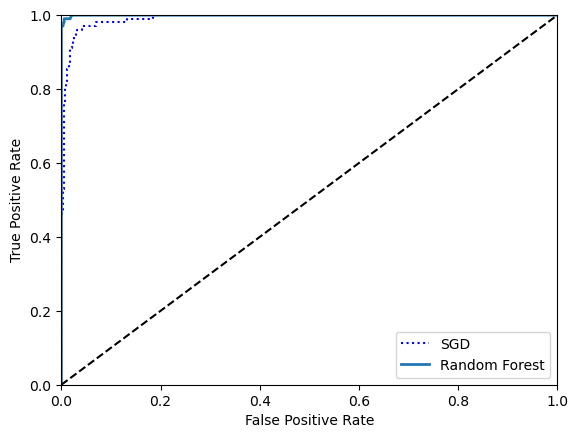

In [170]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [172]:
roc_auc_score(y_train_1, y_scores_forest)

0.9997216035634744

ROC curve for the `RandomForestClassifier` is significantly better than that of the `SGDClassifier`. A curve that is closer to the top-left corner of the plot indicates better performance, as it means the classifier has a high true positive rate and a low false positive rate.

The Area Under the Curve (AUC) score quantifies the overall performance of the classifier. A higher AUC score indicates better model performance. The text mentions that the `RandomForestClassifier` has a significantly better ROC AUC score compared to the `SGDClassifier`, reinforcing its superior performance.

## Multiclass Classification

1. **Direct Multiclass Handling**:
   - Some algorithms (e.g., Random Forest, Naive Bayes) can handle multiple classes directly.
   - Others (e.g., Support Vector Machines, Linear classifiers) are strictly binary classifiers.

2. **One-versus-All (OvA) Strategy**:
   - Train one binary classifier for each class (e.g., 10 classifiers for digits 0-9).
   - Classify an image by selecting the class with the highest decision score from the classifiers.

3. **One-versus-One (OvO) Strategy**:
   - Train a binary classifier for every pair of classes (e.g., distinguish between 0s and 1s, 0s and 2s, etc.).
   - Requires training \(N x (N - 1) / 2\) classifiers for \(N\) classes (e.g., 45 classifiers for MNIST).
     that means n+(n-1)+(n-2)+...+1
   - Classify an image by running it through all classifiers and selecting the class that wins the most duels.

4. **Advantages of OvO**:
   - Each classifier is trained on a smaller subset of the training data, which is beneficial for algorithms that scale poorly with larger datasets.

5. **Preference for OvA or OvO**:
   - OvA is generally preferred for most binary classification algorithms.
   - Scikit-Learn automatically applies OvA for binary classifiers in multiclass tasks, except for SVMs, which use OvO.

This code trains the SGDClassifier on the training set using the original target classes from 0 to 9 (y_train), instead of the 5-versus-all target classes (y_train_1). Then it makes a prediction (a correct one in this case). Under the hood, Scikit-Learn actually trained 10 binary classifiers, got their decision scores for the image, and selected the class with the highest score.

In [182]:
sgd_clf.fit(X_train, y_train)  # y_train, not y_train_1 as we need multiple classes here
sgd_clf.predict([some_digit])

array([1])

To see that this is indeed the case, you can call the decision_function() method. Instead of returning just one score per instance, it now returns 10 scores, one per class

In [185]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-6284.35566548,  1795.58388766, -1048.07659039,  -189.69949284,
        -5669.79324234, -4374.19013785, -2724.65526949, -6571.0960645 ,
        -3017.01919549, -3893.28796926]])

In [187]:
print(np.argmax(some_digit_scores))
print(sgd_clf.classes_)
print(sgd_clf.classes_[9])

1
[0 1 2 3 4 5 6 7 8 9]
9


The index of classes in the `classes_` attribute may match the class values in some cases (like digits), it is not a universal rule. Always check the `classes_` attribute directly to understand the mapping of indices to class labels, especially when dealing with non-numeric or non-sequential classes.

If you want to force ScikitLearn to use one-versus-one or one-versus-all, you can use the OneVsOneClassifier or OneVsRestClassifier classes. Simply create an instance and pass a binary classifier to its constructor. For example, this code creates a multiclass classifier using the OvO strategy, based on a SGDClassifier

In [191]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])
len(ovo_clf.estimators_)

45

 Training a RandomForestClassifier

In [194]:
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

array([1])

You can call predict_proba() to get the list of probabilities that the classifier assigned to each instance for each class:

In [197]:
forest_clf.predict_proba([some_digit])

array([[0.  , 0.71, 0.11, 0.1 , 0.  , 0.01, 0.02, 0.  , 0.05, 0.  ]])

The 0.65 at the 1st index in the array means that the model estimates an 65% probability that the image Multiclass Classification 
represents a 1. It also thinks that the image could instead other number also.

In [200]:
 cross_val_score(forest_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.96107784, 0.98498498, 0.98498498])

In [201]:
 cross_val_score(ovo_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.96407186, 0.97897898, 0.94894895])

In [204]:
 cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.93712575, 0.96396396, 0.93693694])

model achieves high accuracy, particularly when the input features are scaled.

In [207]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.95808383, 0.96696697, 0.94894895])

### Error Analysis

In [210]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[99,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 96,  0,  0,  0,  0,  0,  0,  4,  2],
       [ 0,  0, 98,  1,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0, 98,  0,  2,  0,  1,  1,  2],
       [ 0,  0,  0,  0, 96,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  1,  1, 93,  0,  0,  1,  4],
       [ 0,  1,  0,  0,  0,  1, 98,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 97,  0,  2],
       [ 0,  6,  1,  0,  0,  0,  0,  0, 89,  2],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  4, 94]], dtype=int64)

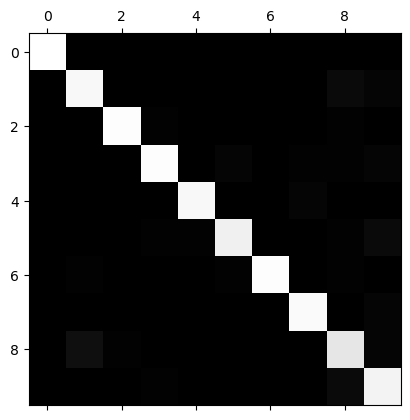

In [212]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

This confusion matrix looks fairly good, since most images are on the main diagonal,which means that they were classified correctly. The 5s look slightly darker than the other digits, which could mean that there are fewer images of 5s in the dataset or that the classifier does not perform as well on 5s as on other digits. 

In [215]:
 row_sums = conf_mx.sum(axis=1, keepdims=True)
 norm_conf_mx = conf_mx / row_sums

Let’s focus the plot on the errors. First, you need to divide each value in the confusion matrix by the number of images in the corresponding class, so you can compare error rates instead of absolute number of errors (which would make abundant classes look unfairly bad)

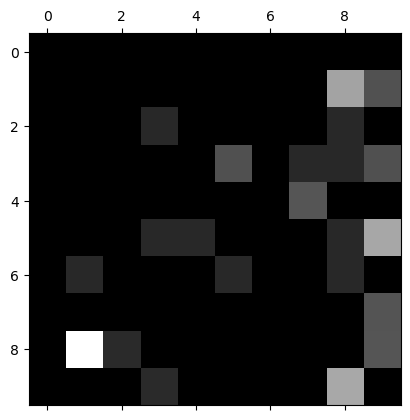

In [218]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

Now you can clearly see the kinds of errors the classifier makes. 
    
Rows represent actual classes, while columns represent predicted classes. 

In [227]:
def plot_digits(images, images_per_row=5, img_shape=(8, 8)):
    """
    Plots a grid of digit images.

    Parameters:
    - images: A list or array of image data.
    - images_per_row: Number of images per row in the grid.
    - img_shape: Shape of each image (default is (28, 28) for MNIST).
    """
    n_images = len(images)
    n_rows = (n_images + images_per_row - 1) // images_per_row
    n_cols = min(n_images, images_per_row)
    plt.figure(figsize=(images_per_row, n_rows))
    
    for idx, image in enumerate(images):
        plt.subplot(n_rows, n_cols, idx + 1)
        plt.imshow(image.reshape(img_shape), cmap="gray_r", interpolation="nearest")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

In [223]:
 cl_a, cl_b = 1,8
 X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
 X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
 X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
 X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

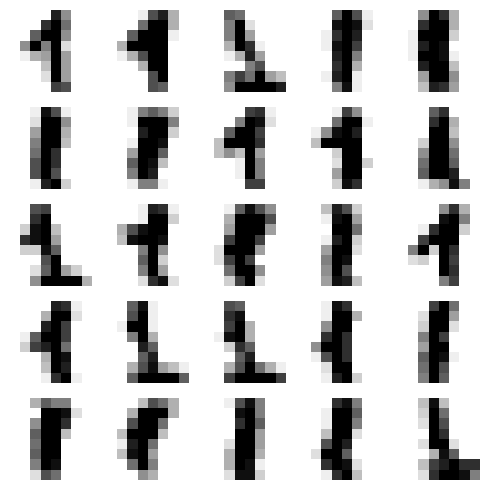

Above are images of 1 predicted as 1 


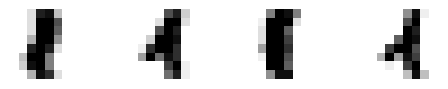

Above are images of 1 predicted as 8 


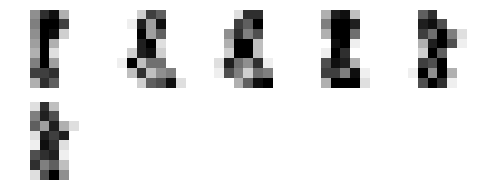

Above are images of 8 predicted as 1 


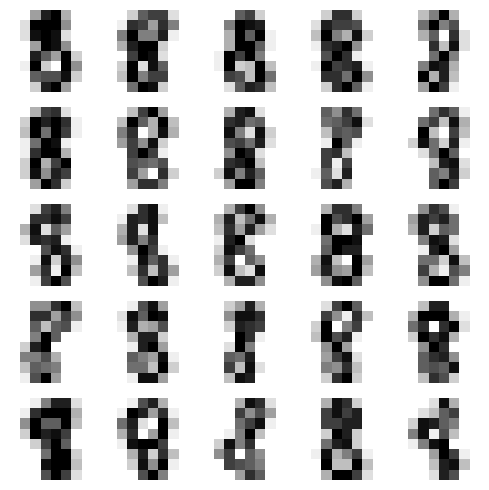

Above are images of 8 predicted as 8 


In [229]:
 # plt.figure(figsize=(8,8))
 # plt.subplot(221);
plot_digits(X_aa[:25], images_per_row=5)
print('Above are images of 1 predicted as 1 ')
 # plt.subplot(222); 
plot_digits(X_ab[:25], images_per_row=5)
print('Above are images of 1 predicted as 8 ')
 # plt.subplot(223); 
plot_digits(X_ba[:25], images_per_row=5)
print('Above are images of 8 predicted as 1 ')
# plt.subplot(224); 
plot_digits(X_bb[:25], images_per_row=5)
print('Above are images of 8 predicted as 8 ')
# plt.show()

Most misclassified images seem like obvious errors to us, and it’s hard to understand why the classifier made the mistakes it did.

The reason is that we used a simple SGDClassifier, which is a linear model.

All it does is assign a weight per class to each pixel, and when it sees a new image it just sums up the weighted pixel intensities to get a score for each class. 


###  Multilabel Classification

For classifier to output multiple classes for each instance. For example, consider a face-recognition classifier: what should it do if it recognizes several people on the same picture?

It should attach one label per person it recognizes.

In [242]:
 from sklearn.neighbors import KNeighborsClassifier
 y_train_large = (y_train >= 7)
 y_train_odd = (y_train % 2 == 1)
 y_multilabel = np.c_[y_train_large, y_train_odd]
 knn_clf = KNeighborsClassifier()
 knn_clf.fit(X_train, y_multilabel)

# here also we are giving multiple labels, but to same digit image

KNeighborsClassifier()

A y_multilabel array containing two target labels for each digit image: the first indicates whether or not the digit is large (7, 8, or 9) and the second indicates whether or not it is odd. The next lines create a KNeighborsClassifier instance (which supports multilabel classification, but not all classifiers do) and we train it using the multiple targets array. 

In [245]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [247]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_train, cv=3)
f1_score(y_train, y_train_knn_pred, average="macro")

0.9779052113107858

There are many ways to evaluate a multilabel classifier, and selecting the right metric really depends on your project. For example, one approach is to measure the F1
score for each individual label (or any other binary classifier metric discussed earlier), then simply compute the average score. This code computes the average F1 score across all labels:

The F1 score is a measure of a model's accuracy that considers both precision and recall. The `average="macro"` parameter means that the F1 score will be calculated for each label independently and then averaged, treating all labels equally.

In [251]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_train, cv=3)
f1_score(y_train, y_train_knn_pred, average="micro")

0.978

In [253]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_train, cv=3)
f1_score(y_train, y_train_knn_pred, average="weighted")

0.9779047774572887

micro:

Calculates metrics globally by considering the sum of true positives, false negatives, and false positives across all classes.
Good for imbalanced datasets when the class frequency is important.

macro:

Calculates metrics for each class independently and then averages them.
Treats all classes equally, which may not work well with imbalanced datasets.

weighted:

Similar to macro, but it considers the support (number of true instances) for each class.
Balances the impact of each class based on its frequency.

This assumes that all labels are equally important, which may not be the case. In particular, if you have many more pictures of Alice than of Bob or Charlie, you may want to give more weight to the classifier’s score on pictures of Alice. One simple option is
to give each label a weight equal to its support (i.e., the number of instances with that target label). To do this, simply set average="weighted" in the preceding code.

### Multioutput Classification

In [302]:
 X_train.shape[1]

64

In [304]:
 X_test.shape[1]

64

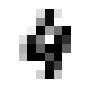

In [306]:
 knn_clf.fit(X_train, X_train)
 clean_digit = knn_clf.predict([X_test[1]])
 plot_digits(clean_digit)

In [308]:
 noise_tr = rnd.randint(0, 9, (len(X_train), 64))
 noise_te = rnd.randint(0, 9, (len(X_test), 64))
 X_train_mod = X_train + noise_tr
 X_test_mod = X_test + noise_te
 y_train_mod = X_train
 y_test_mod = X_test

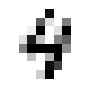

In [310]:
 knn_clf.fit(X_train_mod, y_train_mod)
 clean_digit = knn_clf.predict([X_test_mod[1]])
 plot_digits(clean_digit)

In [312]:
y_test[1]

4

(1797, 64)


<Figure size 640x480 with 0 Axes>

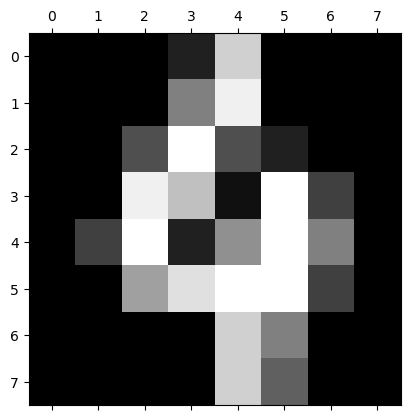

In [314]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(digits.images[100])
plt.show()

--------------------------------------------------------------------------------------------